In [2]:
pip install -q qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.0 MB/s eta 0:00:00


In [6]:
pip install -q qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.7 MB/s eta 0:00:00


In [56]:
pip install -q qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.5 MB/s eta 0:00:00


In [1]:
from qiskit import QuantumCircuit, transpile, assemble, IBMQ
from qiskit.visualization import circuit_drawer
import qiskit_aer
import matplotlib.pyplot as plt

# Create a quantum circuit with two qubits
bell_circuit = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
bell_circuit.h(0)

# Apply a CNOT gate with the first qubit as the control and the second qubit as the target
bell_circuit.cx(0, 1)

# Add measurements to the circuit
bell_circuit.measure([0, 1], [0, 1])

# Visualize the circuit
print("Quantum Circuit:")
print(bell_circuit)

Quantum Circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [2]:
# Number of shots
num_shots = 10000

# Simulate the circuit using the Aer simulator
simulator = qiskit_aer.Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
transpiled_circuit = transpile(bell_circuit, simulator)

# Execute the transpiled circuit on the simulator with the specified number of shots
result = simulator.run(transpiled_circuit, shots=num_shots).result()

# Get measurement counts
counts = result.get_counts(bell_circuit)

# Get and print the measurement results
counts = result.get_counts(bell_circuit)
print("\nMeasurement Results:")
print(counts)


Measurement Results:
{'00': 4888, '11': 5112}


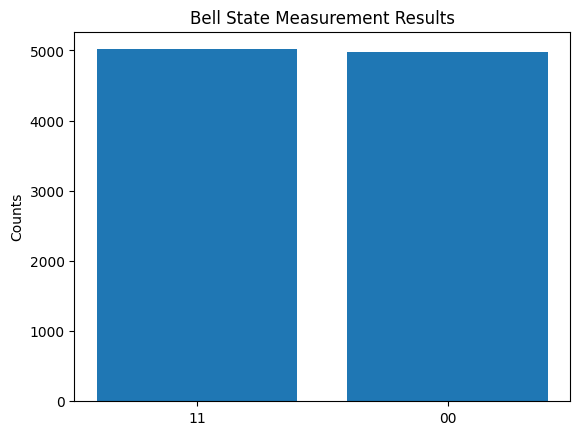

In [54]:
# Plot the histogram using Matplotlib
plt.bar(counts.keys(), counts.values())
plt.title('Bell State Measurement Results')
plt.ylabel('Counts')
plt.show()

In [3]:
# Provide your IBM Quantum Experience API token here
#api_token = 'your_api_token'
api_token = '4155b71f22eb3c7c385dcceb3b445f95a6f7b517d67336eac6b6bdce842c869e3fca7a5bca1d97a2331e689d3af55083ebc25b8451a028e28901936b3c5ea527'
# Load your IBM Quantum account
IBMQ.save_account(api_token, overwrite=True)  # This stores your credentials locally
IBMQ.load_account()

# Get the least busy backend
#provider = IBMQ.get_provider(hub='your_hub', group='your_group', project='your_project')
provider = IBMQ.get_provider(hub='ibm-q', group ='open', project='main')
#backend = provider.get_backend('your_preferred_backend')
backend = provider.get_backend('ibm_osaka')

# Create a quantum circuit with two qubits
bell_circuit = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
bell_circuit.h(0)

# Apply a CNOT gate with the first qubit as the control and the second qubit as the target
bell_circuit.cx(0, 1)

# Add measurements to the circuit
bell_circuit.measure([0, 1], [0, 1])

# Transpile the circuit for the chosen backend
transpiled_circuit = transpile(bell_circuit, backend)

# Execute the transpiled circuit on the IBM Quantum computer
qobj = assemble(transpiled_circuit, shots=1024)  # You can adjust the number of shots
result = backend.run(qobj).result()

# Get measurement counts
counts = result.get_counts(bell_circuit)
print("\nMeasurement Results:")
print(counts)

/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_88673/2276178003.py:5: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(api_token, overwrite=True)  # This stores your credentials locally
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_88673/2276178003.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(api_token, o


Measurement Results:
{'00': 486, '10': 30, '11': 490, '01': 18}


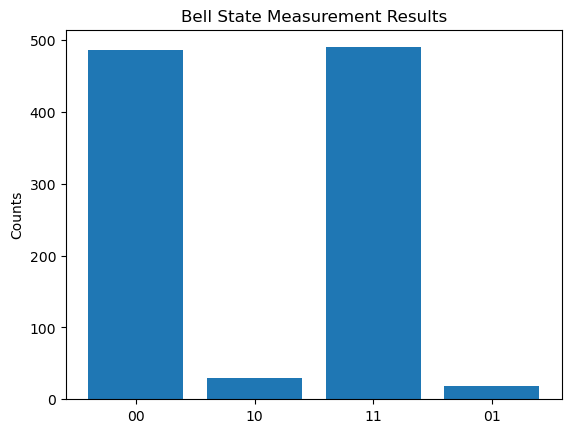

In [4]:
# Plot the histogram using Matplotlib
plt.bar(counts.keys(), counts.values())
plt.title('Bell State Measurement Results')
plt.ylabel('Counts')
plt.show()